# Qa of Tractography Tutorial

This tutorial provides a basic overview of how to run QA of Tractography manually within Python. 
We begin by checking for dependencies, then we set our input parameters and output file path, then we smiply run.

# Dependencies

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

from fury import actor, window, colormap, ui
from dipy.tracking.streamline import Streamlines
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

# Set our input/output path

In [2]:
# Change the stream_path manually, the stream_path is the path for the input streamline.trk file.
stream_path = "/Users/zhenhu/Desktop/qa_fiber/streamlines.trk"

# Change the qa_out_path manually, the qa_out_path is the path for the output QA imgae file.
qa_out_path = "/Users/zhenhu/Desktop/vertical"

# Change the brain_path manually, the brain_path is the path for the reference brain scan, in order to get the scan volume..
brain_path = "/Users/zhenhu/Documents/NDD/Downloads/ndmg_outputs2/sub-0025864/ses-1/dwi/preproc/eddy_corrected_data_reor_RAS_res.nii.gz"

# The Code

In [3]:
def combine_plot(qa_out_path, brain_path):
    """
    Combine the nine plots produced by qa_tractography function into one image.

    Parameters
    ----------
    qa_out_path : str
        Path for the output QA imgae file(s)
    brain_path : str
        Path for the reference brain scan, in order to get the scan volume.
    """

    # Get the scan volume of the brain.
    brain_ref = nib.load(brain_path)
    brain_ref_shape = brain_ref.shape[0:3]

    plots_list = [
        "Rotate_Z_axis_000000.png",
        "Rotate_Z_axis_000001.png",
        "Rotate_Z_axis_000002.png",
        "Rotate_Y_axis_000000.png",
        "Rotate_Y_axis_000001.png",
        "Rotate_Y_axis_000002.png",
        "Rotate_X_axis_000000.png",
        "Rotate_X_axis_000001.png",
        "Rotate_X_axis_000002.png",
    ]
    y_labels = ["Rotate with Z axis", "Rotate with Y axis", "Rotate with X axis"]
    x_labels = ["angle=0", "angle=120", "angle=240"]

    # Temporary list to store the image nparray:
    im_arr = []

    fig = plt.figure()
    plt.title(
        f"QA_tractography. Scan volume = {brain_ref_shape} \n\n",
        fontsize=60,
        fontweight="bold",
    )
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")

    j = 0
    for i in range(9):
        # Load in the nine images into a nparray one by one.
        im_arr = np.array(Image.open(qa_out_path + "/" + plots_list[i]))
        # Change the background of the image into black:
        im_arr = np.where(im_arr <= 0.01, 255, im_arr)
        ax = fig.add_subplot(3, 3, i + 1)
        ax.imshow(im_arr, interpolation="none", alpha=0.9)

        # Set the X labels and Y labels
        if i < 3:
            ax.set_title(x_labels[i], fontsize=60, fontweight="bold")
        if i % 3 == 0:
            ax.set_ylabel(y_labels[j], fontsize=60, fontweight="bold")
            j = j + 1
        plt.xticks([])
        plt.yticks([])

    fig.set_size_inches(40, 40, forward=True)
    fig.savefig(qa_out_path + "/" + "qa_tractography.png", format="png")

    # Delete the Nine images which used to generate the qa_tractography.png
    for plot in plots_list:
        if os.path.exists(qa_out_path + "/" + plot):
            os.remove(qa_out_path + "/" + plot)
        else:
            print(
                "No such file generated from streamlines window. Please check if the streamline.trk files is generated from the pipeline correctly or not"
            )


def qa_tractography(stream_path, qa_out_path, brain_path):
    """
    Visualize the streamlines,
    then using window.record to get nine snapshots of the 3D streamslines.

    Parameters
    ----------
    stream_path : str
        Path for the input streamline.trk file(s).
    qa_out_path_path : str
        Path for the output QA imgae file(s)
    brain_path : str
        Path for the reference brain scan, in order to get the scan volume.
    """

    # Use window to visualize the streamlines
    r = window.renderer()

    # Load the streamline.trk file
    streamlines_mni_load = nib.streamlines.load(stream_path).streamlines
    streamlines_mni_in = Streamlines(streamlines_mni_load)
    streamlines_actor = actor.line(
        streamlines_mni_in,
        colormap.line_colors(streamlines_mni_in),
        lod_points=10000,
        depth_cue=True,
        linewidth=0.2,
        fake_tube=True,
        opacity=0.3,
    )

    r.add(streamlines_actor)
    # window.show(r)

    showmng = window.ShowManager(r)
    # window.record function can rotate the 3D-image, then get the snapshot of the specific angle.
    window.record(
        r,
        cam_pos=(70.03, 64.97, 269.80),
        cam_view=(0, 1, 0),
        path_numbering=True,
        out_path=qa_out_path + "/Rotate_Z_axis_",
        az_ang=120,
        n_frames=3,
        reset_camera=True,
        size=(600, 600),
    )
    window.record(
        r,
        cam_pos=(70.03, 64.97, 269.80),
        cam_view=(1, 0, 0),
        path_numbering=True,
        out_path=qa_out_path + "/Rotate_Y_axis_",
        az_ang=120,
        n_frames=3,
        reset_camera=True,
        size=(600, 600),
    )
    window.record(
        r,
        cam_pos=(70.03, 64.97, 269.80),
        cam_view=(0, 0, 1),
        path_numbering=True,
        out_path=qa_out_path + "/Rotate_X_axis_",
        az_ang=120,
        n_frames=3,
        reset_camera=True,
        size=(600, 600),
    )
    showmng.exit()
    combine_plot(qa_out_path, brain_path)

# Run the code

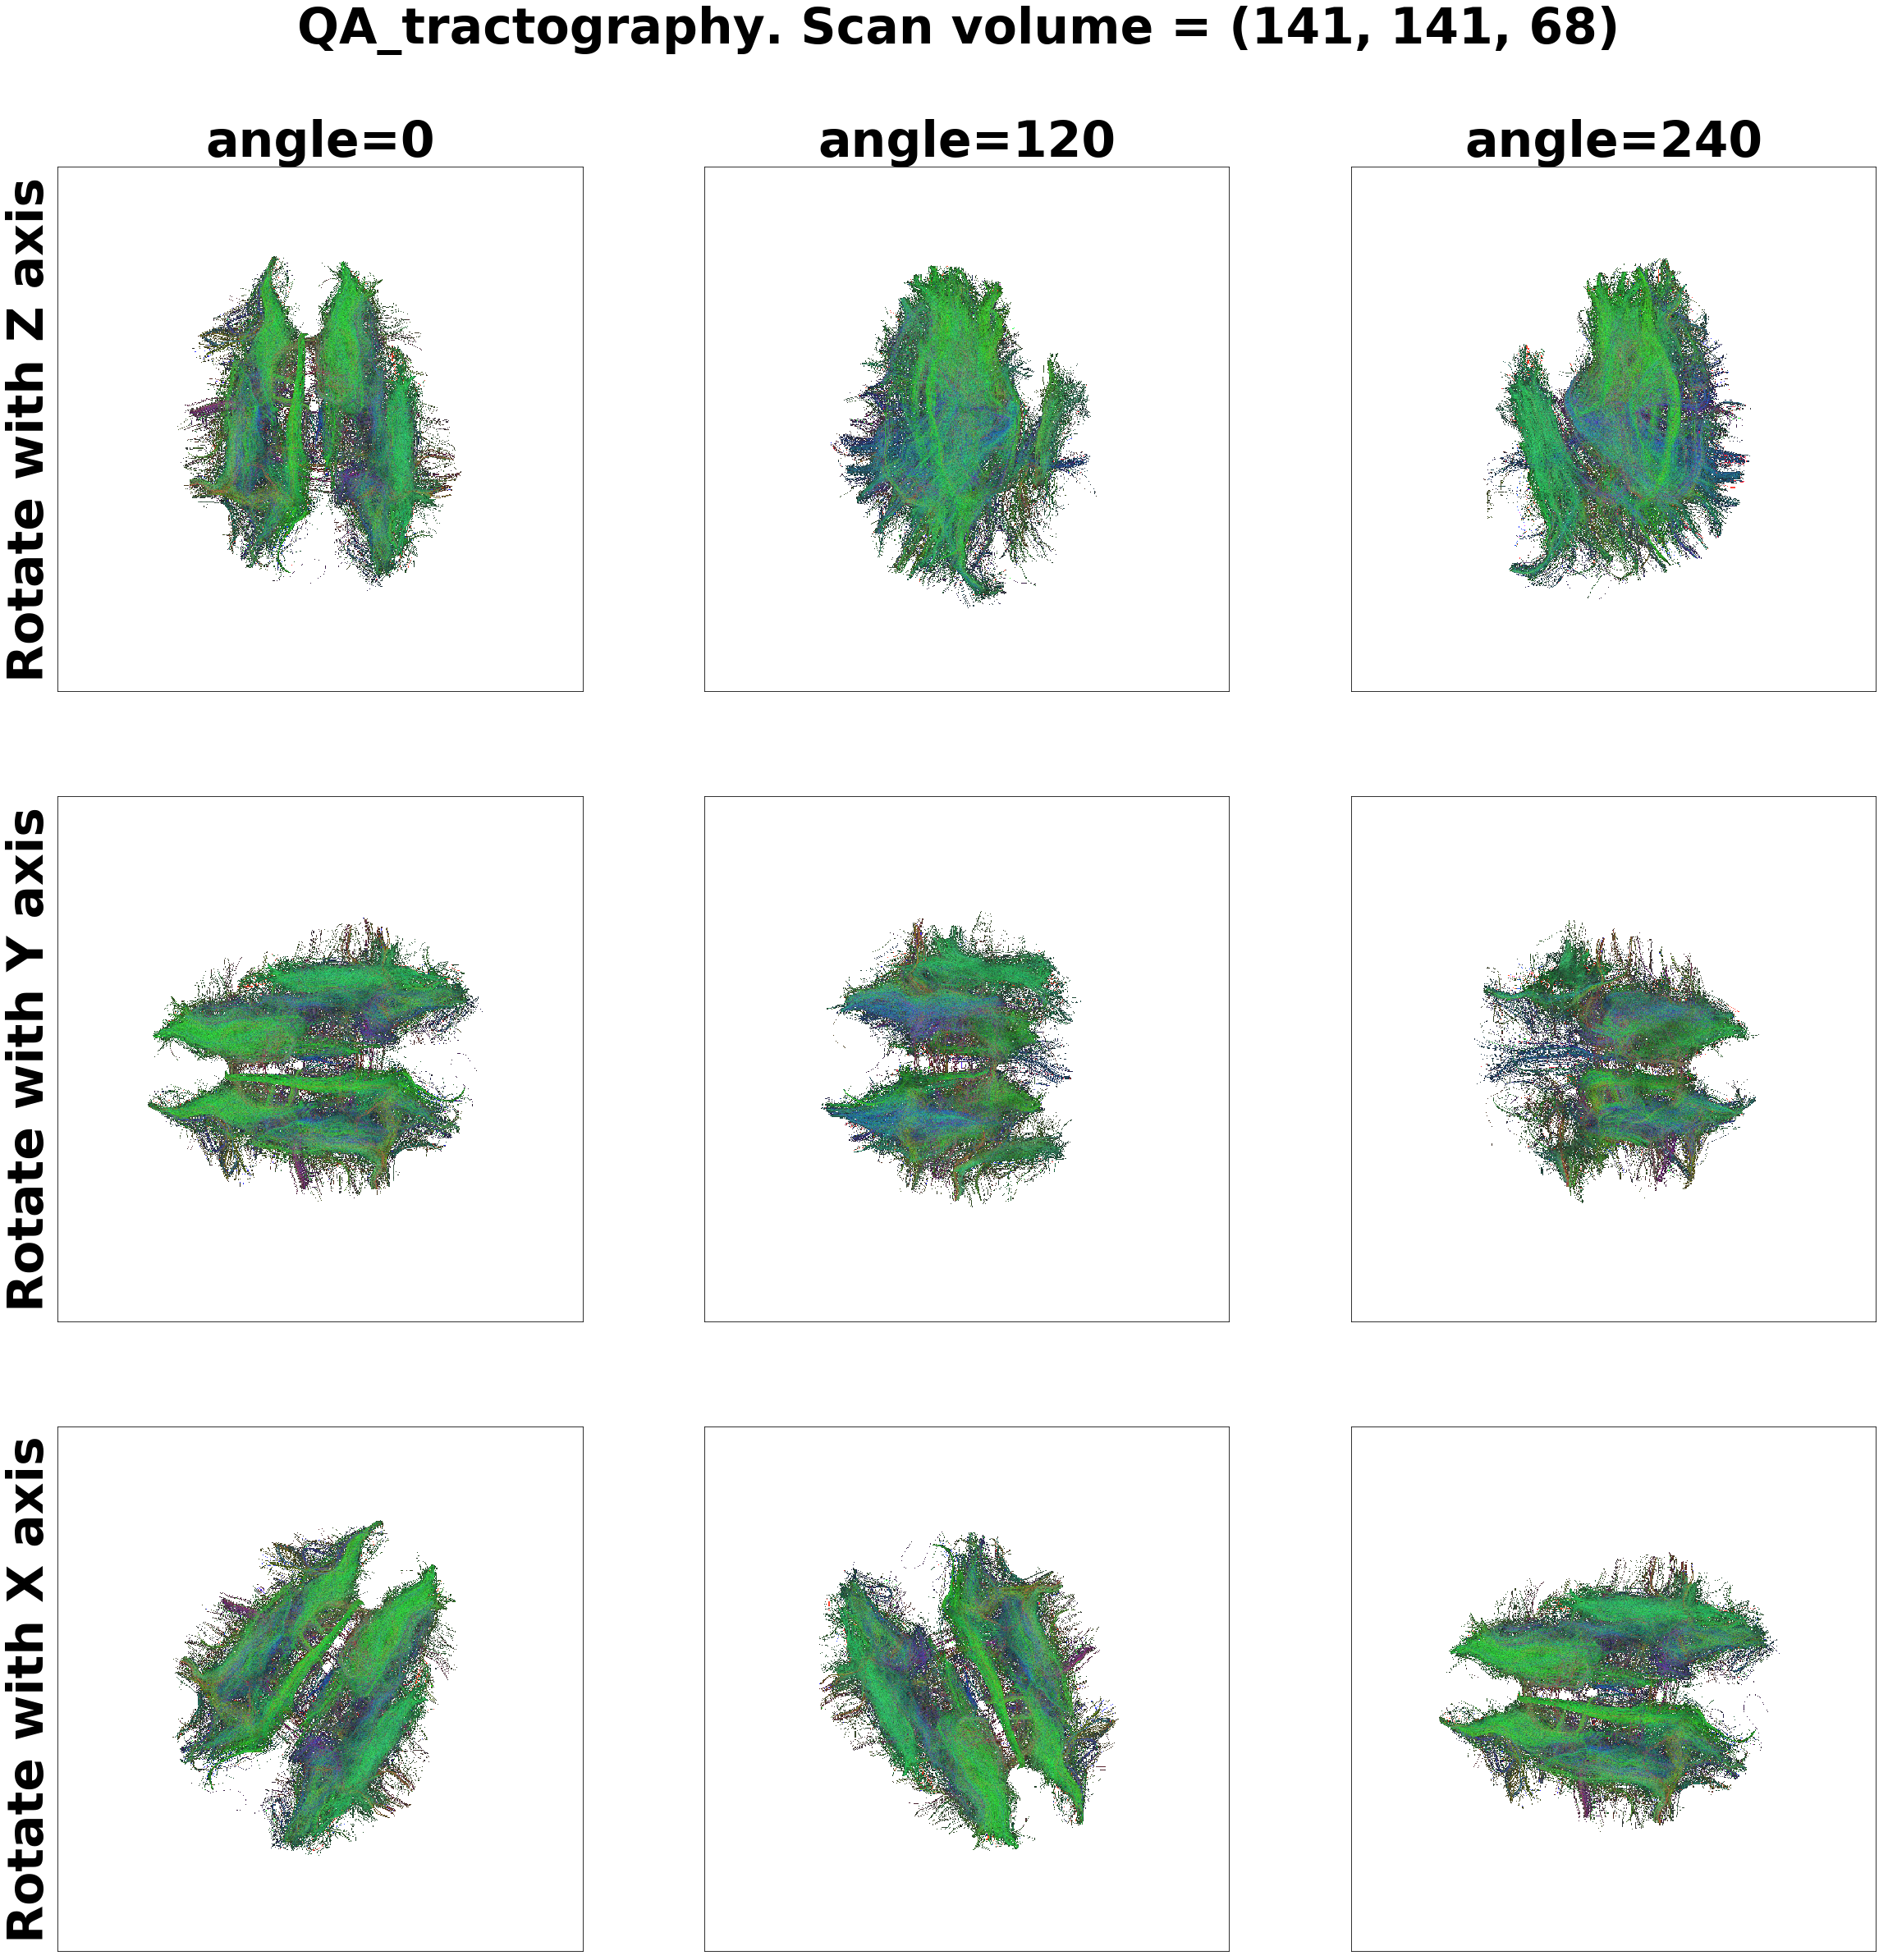

In [4]:
qa_tractography(stream_path, qa_out_path, brain_path)

If the Image didn't show, please make sure the stremlines path is correct.

# High seed case

The streamline.trk file is different from the former one. When you run the pipeline, you can set the parameter seed to a bigger number.

In [5]:
stream_path = "/Users/zhenhu/Downloads/streamlines.trk"

qa_out_path = "/Users/zhenhu/Desktop/vertical"

brain_path = "/Users/zhenhu/Documents/NDD/Downloads/ndmg_outputs2/sub-0025864/ses-1/dwi/preproc/eddy_corrected_data_reor_RAS_res.nii.gz"

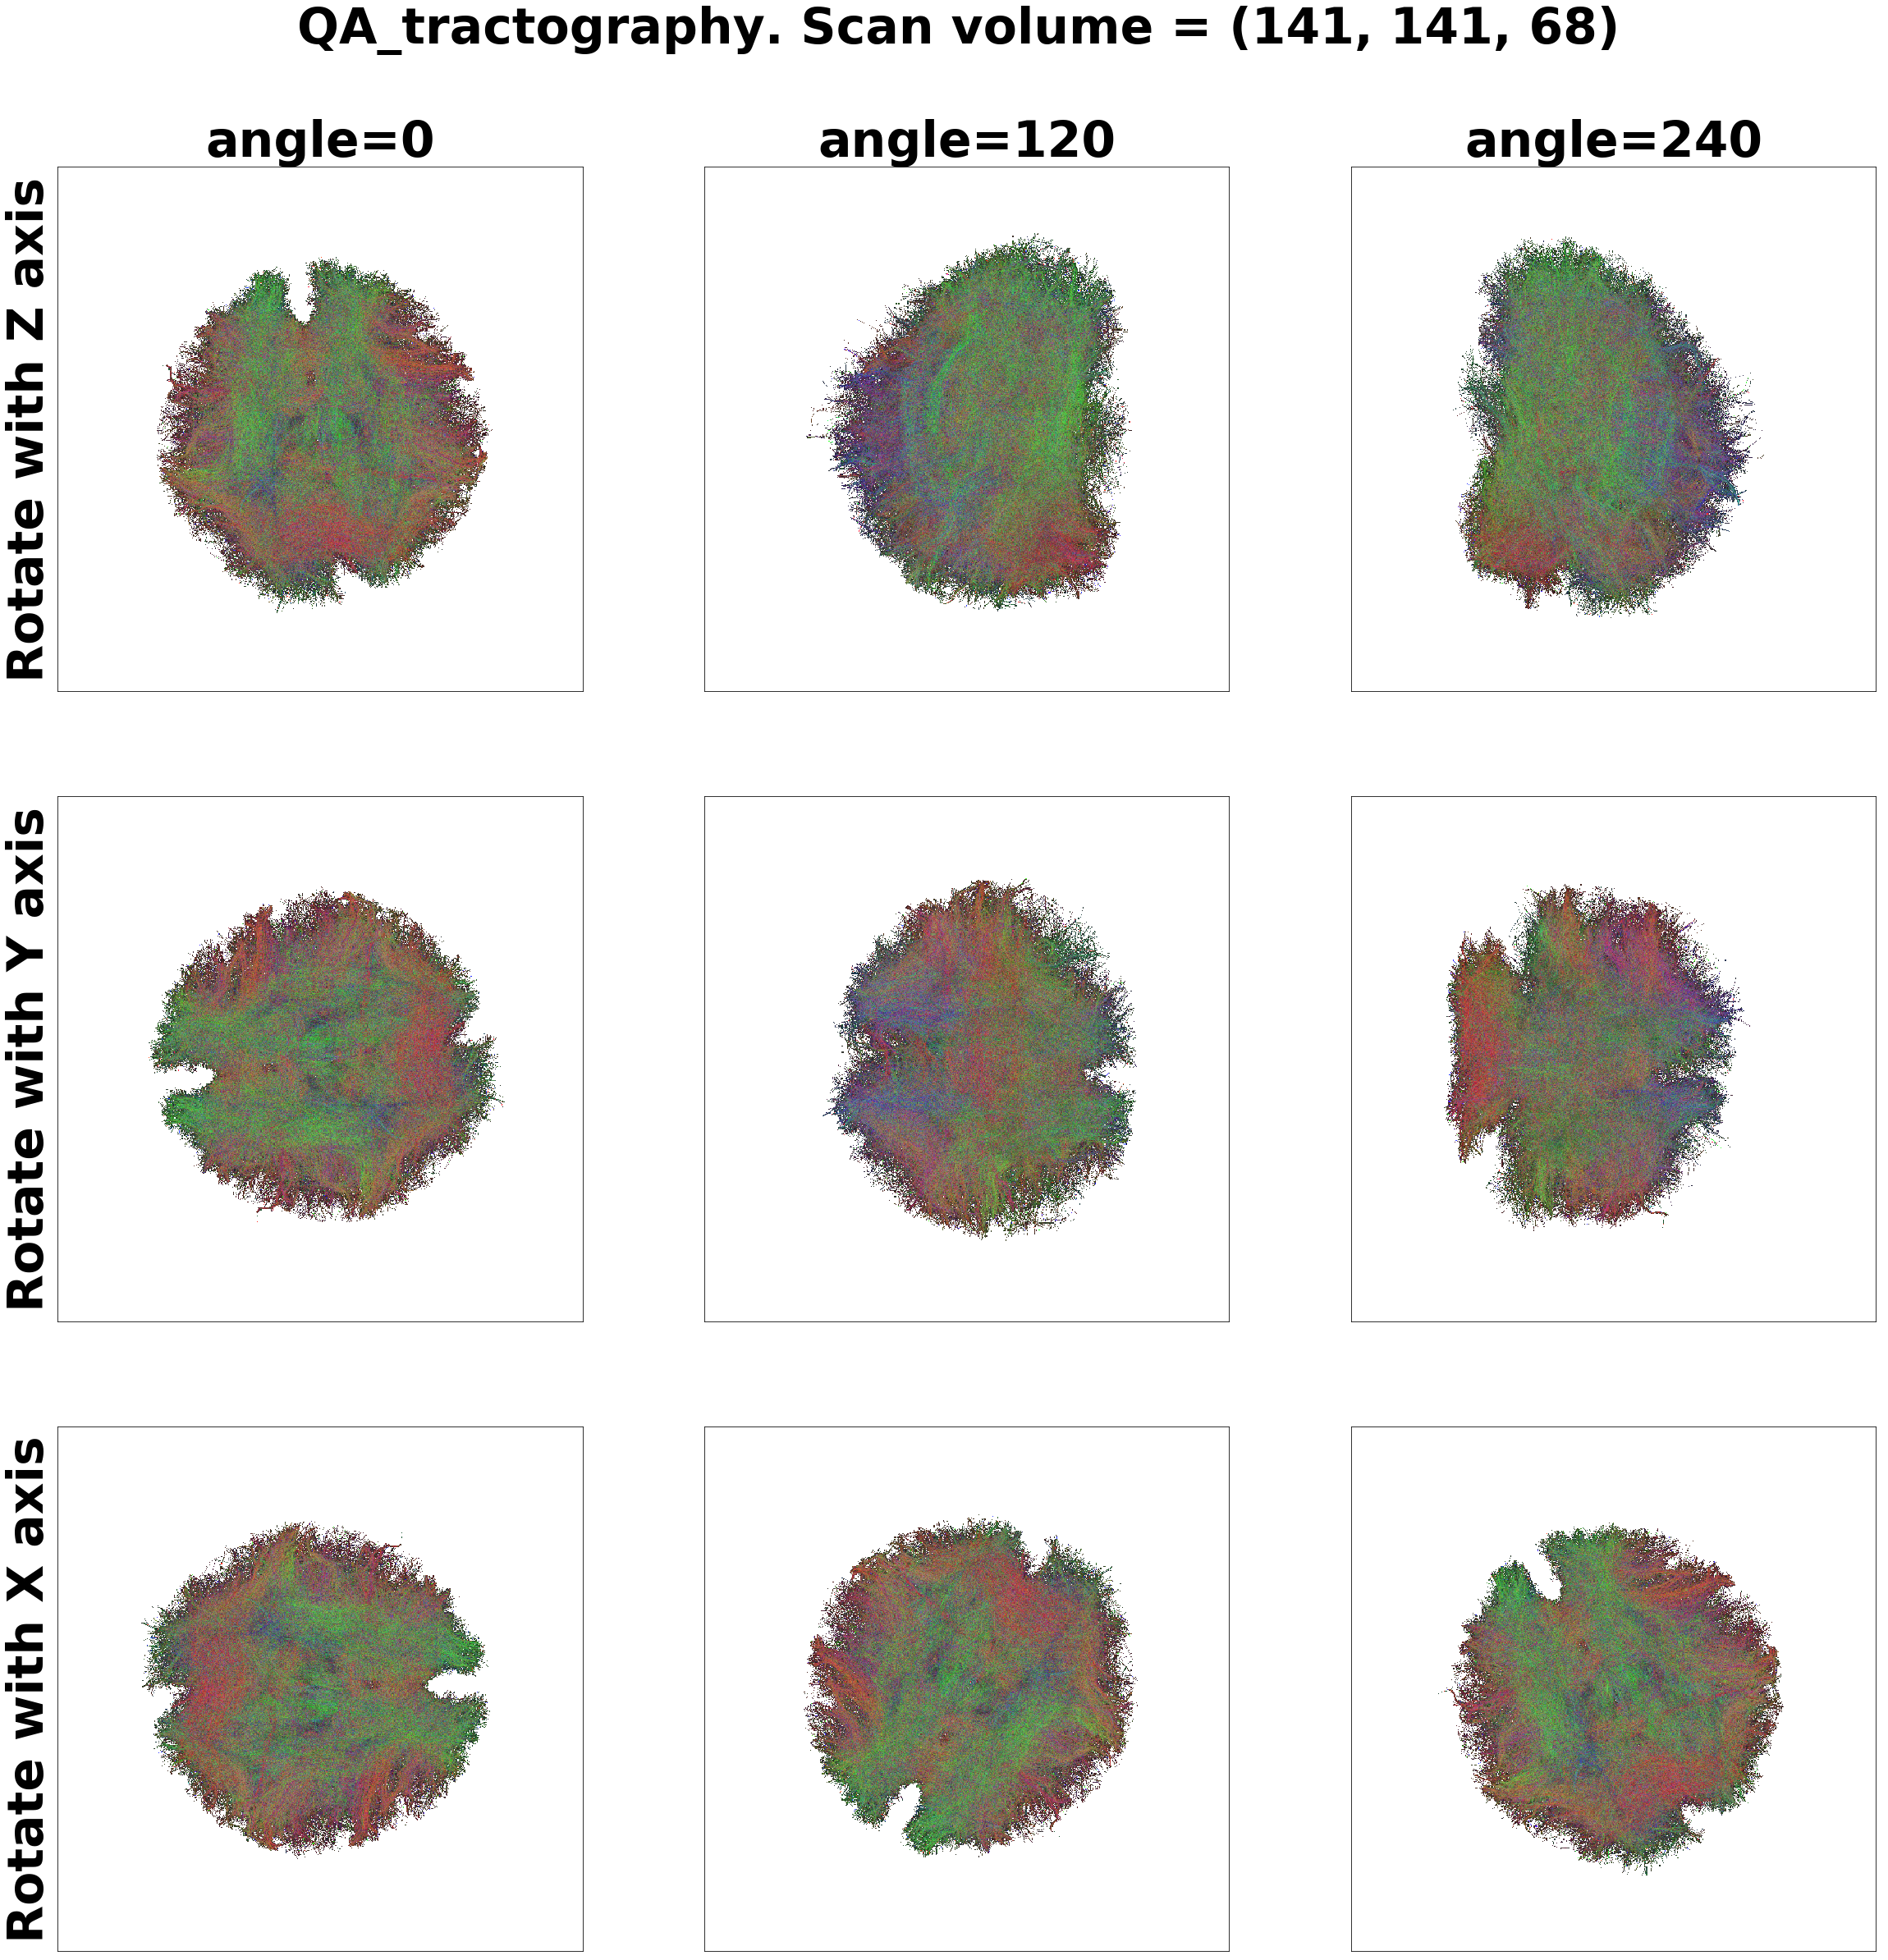

In [6]:
qa_tractography(stream_path, qa_out_path, brain_path)

The difference between the high seed case and the low seed case:
The connection of fibers in high seed case is more dense.

# How to view the streamline in 3D